Dados processados e salvos em language_trends.csv


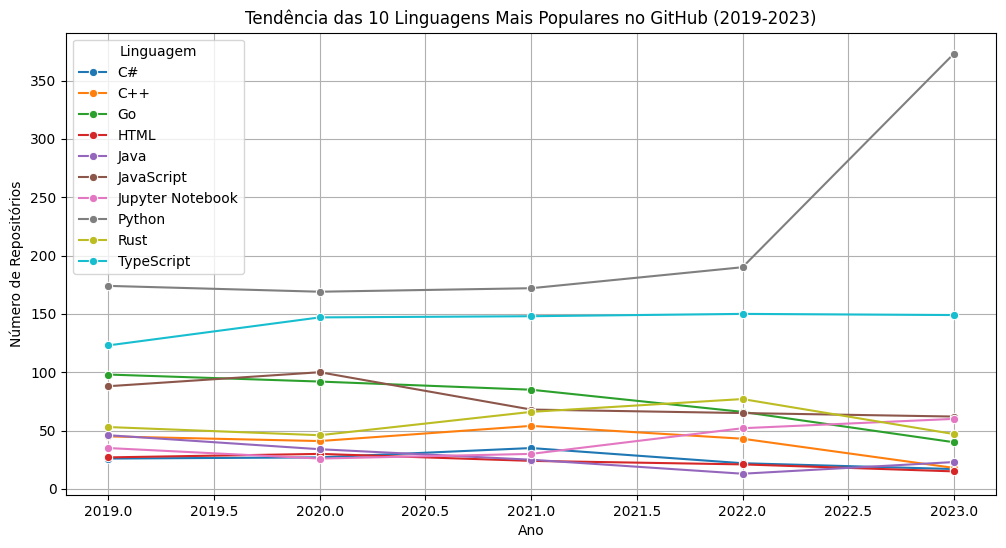

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("github_repositories.csv")
df = df.dropna(subset=["language"])

df["year"] = pd.to_datetime(df["created_at"]).dt.year
language_trends = df.groupby(["year", "language"]).size().reset_index(name="count")

language_trends.to_csv("language_trends.csv", index=False)
print("Dados processados e salvos em language_trends.csv")

df_data = pd.read_csv("language_trends.csv")

top_languages = df_data.groupby("language")["count"].sum().nlargest(10).index.tolist()

df_top = df_data[df_data["language"].isin(top_languages)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x="year", y="count", hue="language", marker="o")
plt.title("Tendência das 10 Linguagens Mais Populares no GitHub (2019-2023)")
plt.xlabel("Ano")
plt.ylabel("Número de Repositórios")
plt.legend(title="Linguagem")
plt.grid(True)
plt.show()